In [46]:
import pandas as pd
from scipy import stats
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [47]:
#SIFT
#proteins
proteins = {'A0A087X1C5': 0.15180582524271832, 'O15528': 0.1916535433070863, 'O43174': 0.1971428571428568, 'O75881': 0.18824110671936714, 'P04798': 0.12273437499999974, 'P05093': 0.15454724409448795, 'P05108': 0.16378119001919347, 'P05177': 0.12782945736434084, 'P05181': 0.1272616632860039, 'P08684': 0.12224652087475142, 'P08686': 0.15854251012145745, 'P10632': 0.12548979591836726, 'P10635': 0.15404426559356105, 'P11509': 0.12914979757085004, 'P11511': 0.13145129224652086, 'P11712': 0.1263673469387754, 'P13584': 0.15587084148727962, 'P15538': 0.15341948310139125, 'P19099': 0.1566600397614311, 'P20813': 0.13050916496944984, 'P20815': 0.12527888446215132, 'P20853': 0.12921052631578933, 'P22680': 0.18426587301587255, 'P24462': 0.12703777335984096, 'P24557': 0.140262664165103, 'P24903': 0.12961303462321774, 'P33260': 0.12506122448979579, 'P33261': 0.1253265306122448, 'P51589': 0.1537051792828683, 'P78329': 0.1530192307692305, 'P98187': 0.1575192307692304, 'Q02318': 0.184745762711864, 'Q02928': 0.1499229287090555, 'Q07973': 0.18287937743190624, 'Q08477': 0.15744230769230744, 'Q16647': 0.18525999999999976, 'Q16678': 0.1357274401473293, 'Q16696': 0.1286032388663966, 'Q16850': 0.20363457760314307, 'Q4G0S4': 0.18463099630996266, 'Q5TCH4': 0.148940269749518, 'Q6NT55': 0.15685499058380395, 'Q6UW02': 0.23616883116883106, 'Q6V0L0': 0.2015134099616854, 'Q6VVX0': 0.1847504990019955, 'Q6ZSU1': 0.12767123287671242, 'Q6ZWL3': 0.19159999999999933, 'Q7Z449': 0.18775735294117596, 'Q86W10': 0.15403960396039582, 'Q8N118': 0.15436149312377187, 'Q8N1L4': 0.1608235294117646, 'Q8TAV3': 0.13759183673469375, 'Q96SQ9': 0.13611111111111085, 'Q9HB55': 0.1225447316103379, 'Q9HBI6': 0.1538167938931295, 'Q9HCS2': 0.15419847328244254, 'Q9NR63': 0.18861328124999951, 'Q9NYL5': 0.2359914712153515, 'Q9UNU6': 0.18291417165668641, 'Q9Y6A2': 0.23345999999999986}

#tunnels
tunnels = {'A0A087X1C5': 0.20054263565891475, 'O15528': 0.14475490196078433, 'O43174': 0.11702247191011236, 'O75881': 0.16576811594202895, 'P04798': 0.08950331125827818, 'P05093': 0.11631284916201118, 'P05177': 0.1, 'P05181': 0.13488372093023254, 'P08684': 0.12401785714285715, 'P08686': 0.13180281690140844, 'P10632': 0.1385714285714286, 'P10635': 0.1948936170212766, 'P11509': 0.12220338983050849, 'P11511': 0.08619047619047622, 'P11712': 0.14830985915492959, 'P13584': 0.22421052631578947, 'P15538': 0.11528846153846153, 'P19099': 0.16851351351351349, 'P20813': 0.11666666666666668, 'P20815': 0.12115646258503403, 'P20853': 0.11369747899159664, 'P24462': 0.1152061855670103, 'P24557': 0.13231788079470203, 'P24903': 0.13375, 'P33260': 0.12893203883495147, 'P33261': 0.13650176678445228, 'P51589': 0.12645502645502646, 'P78329': 0.15639534883720935, 'P98187': 0.19782608695652168, 'Q02318': 0.13390109890109891, 'Q02928': 0.18266666666666664, 'Q07973': 0.1620731707317073, 'Q08477': 0.19027522935779817, 'Q16647': 0.15338129496402877, 'Q16678': 0.11916666666666667, 'Q16696': 0.11827586206896554, 'Q16850': 0.1466666666666667, 'Q4G0S4': 0.1562222222222222, 'Q5TCH4': 0.17746376811594203, 'Q6NT55': 0.16110576923076925, 'Q6UW02': 0.2613089005235602, 'Q6V0L0': 0.1470718232044199, 'Q6VVX0': 0.18922330097087378, 'Q6ZWL3': 0.19908333333333333, 'Q7Z449': 0.1947027027027027, 'Q86W10': 0.14235955056179778, 'Q8N118': 0.13666666666666666, 'Q8TAV3': 0.12606250000000002, 'Q96SQ9': 0.12941176470588237, 'Q9HB55': 0.12026845637583894, 'Q9HBI6': 0.17701754385964913, 'Q9HCS2': 0.19700598802395208, 'Q9NR63': 0.11838565022421527, 'Q9NYL5': 0.16954635108481259, 'Q9UNU6': 0.15563218390804598, 'Q9Y6A2': 0.21762376237623762}

#ligands
cofactors = {'A0A087X1C5': 0.07000000000000002, 'O15528': 0.07294117647058826, 'O43174': 0.08687500000000002, 'O75881': 0.1829032258064516, 'P04798': 0.06500000000000002, 'P05093': 0.0635294117647059, 'P05108': 0.07411764705882354, 'P05177': 0.07120000000000001, 'P05181': 0.06937500000000003, 'P08684': 0.06000000000000002, 'P08686': 0.09388888888888891, 'P10632': 0.06842105263157898, 'P10635': 0.07600000000000003, 'P11509': 0.0735714285714286, 'P11511': 0.0755, 'P11712': 0.07470588235294122, 'P13584': 0.07375000000000002, 'P15538': 0.06466666666666668, 'P19099': 0.07833333333333334, 'P20813': 0.07388888888888893, 'P20815': 0.06500000000000002, 'P20853': 0.06615384615384615, 'P22680': 0.10058823529411766, 'P24462': 0.07222222222222224, 'P24557': 0.0666666666666667, 'P24903': 0.07222222222222224, 'P33260': 0.07400000000000002, 'P33261': 0.07062500000000002, 'P51589': 0.07352941176470591, 'P78329': 0.06384615384615387, 'P98187': 0.066875, 'Q02318': 0.07058823529411767, 'Q02928': 0.07461538461538463, 'Q07973': 0.08136363636363639, 'Q08477': 0.06416666666666669, 'Q16647': 0.219, 'Q16678': 0.06823529411764707, 'Q16696': 0.07625000000000003, 'Q16850': 0.05, 'Q4G0S4': 0.07125000000000002, 'Q5TCH4': 0.0730769230769231, 'Q6NT55': 0.06411764705882354, 'Q6UW02': 0.21071428571428572, 'Q6V0L0': 0.07588235294117648, 'Q6VVX0': 0.06437500000000002, 'Q6ZSU1': 0.06599999999999999, 'Q6ZWL3': 0.06571428571428573, 'Q7Z449': 0.07333333333333335, 'Q86W10': 0.06533333333333335, 'Q8N118': 0.06882352941176473, 'Q8N1L4': 0.066, 'Q8TAV3': 0.06733333333333333, 'Q96SQ9': 0.07529411764705886, 'Q9HB55': 0.07125000000000002, 'Q9HBI6': 0.07272727272727274, 'Q9HCS2': 0.05125000000000002, 'Q9NR63': 0.08294117647058827, 'Q9NYL5': 0.17410256410256414, 'Q9UNU6': 0.0935294117647059, 'Q9Y6A2': 0.135}



In [48]:


# Předpokládáme, že proteins, tunnels, cofactors jsou už definované slovníky

# Najdeme společné proteiny
common_ids = list(set(proteins) & set(tunnels) & set(cofactors))

# Vytvoříme DataFrame
datay = pd.DataFrame({
    "Protein": [proteins[pid] for pid in common_ids],
    "Tunnel": [tunnels[pid] for pid in common_ids],
    "Cofactor": [cofactors[pid] for pid in common_ids]
})

# Výpis základních statistik
print("Descriptive statistics:")
print(datay.describe())

# T-test (párový)
print("\nT-test (paired):")
print("Protein vs Tunnel:", ttest_rel(datay["Protein"], datay["Tunnel"]).pvalue)
print("Tunnel vs Cofactor:", ttest_rel(datay["Tunnel"], datay["Cofactor"]).pvalue)

# Wilcoxonův test (neparametrický)
print("\nWilcoxon signed-rank test:")
print("Protein vs Tunnel:", wilcoxon(datay["Protein"], datay["Tunnel"]).pvalue)
print("Tunnel vs Cofactor:", wilcoxon(datay["Tunnel"], datay["Cofactor"]).pvalue)



Descriptive statistics:
         Protein     Tunnel   Cofactor
count  56.000000  56.000000  56.000000
mean    0.157948   0.149719   0.081178
std     0.030521   0.035783   0.034673
min     0.122247   0.086190   0.050000
25%     0.129512   0.121942   0.066538
50%     0.153928   0.140465   0.072222
75%     0.184660   0.171414   0.075596
max     0.236169   0.261309   0.219000

T-test (paired):
Protein vs Tunnel: 0.054898690493033746
Tunnel vs Cofactor: 6.504620564100802e-18

Wilcoxon signed-rank test:
Protein vs Tunnel: 0.05629334847777003
Tunnel vs Cofactor: 4.370967329567246e-10


In [49]:
#CONFIDENSE INTERVALS 


# DataFrame se společnými proteiny
common_ids = set(proteins) & set(tunnels) & set(cofactors)
datay = pd.DataFrame({
    "Protein": [proteins[pid] for pid in common_ids],
    "Tunnel": [tunnels[pid] for pid in common_ids],
    "Cofactor": [cofactors[pid] for pid in common_ids]
})

# Rozdíly
diff_sift_tunnel = datay["Protein"] - datay["Tunnel"]
diff_tunnel_cofactor = datay["Tunnel"] - datay["Cofactor"]

# Funkce pro výpočet 95% CI pro párový rozdíl
def paired_confidence_interval(data, alpha=0.05):
    n = len(data)
    mean_diff = np.mean(data)
    sem = stats.sem(data)
    margin = stats.t.ppf(1 - alpha/2, df=n-1) * sem
    return mean_diff, mean_diff - margin, mean_diff + margin

# Výstup
for label, diff in [("Protein - Tunnel", diff_sift_tunnel), ("Tunnel - Cofactor", diff_tunnel_cofactor)]:
    mean_diff, ci_low, ci_high = paired_confidence_interval(diff)
    print(f"{label}: mean = {mean_diff:.4f}, 95% CI = ({ci_low:.4f}, {ci_high:.4f})")


Protein - Tunnel: mean = 0.0082, 95% CI = (-0.0002, 0.0166)
Tunnel - Cofactor: mean = 0.0685, 95% CI = (0.0577, 0.0794)


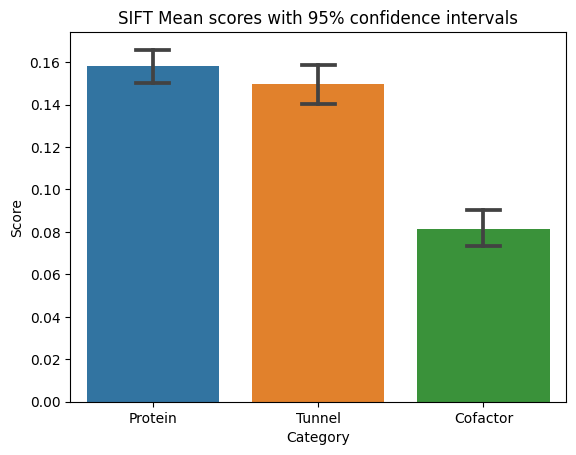

In [50]:


# Reshape for seaborn
melted = datay.melt(var_name="Category", value_name="Score")
sns.barplot(data=melted, x="Category", y="Score", ci=95, capsize=0.2)

plt.title("SIFT Mean scores with 95% confidence intervals")
plt.ylabel("Score")
plt.show()


In [51]:
#ANOVA

In [52]:
f_stat, p_value = stats.f_oneway(datay["Protein"], datay["Tunnel"], datay["Cofactor"])

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 87.41555659551881
p-value: 1.2978260955454622e-26


In [53]:


# Ujisti se, že každá část je list
protein_scores = list(datay["Protein"])
tunnel_scores = list(datay["Tunnel"])
cofactor_scores = list(datay["Cofactor"])

# Slouč vše do jednoho DataFrame
df = pd.DataFrame({
    "Score": protein_scores + tunnel_scores + cofactor_scores,
    "Category": (
        ["Protein"] * len(protein_scores) +
        ["Tunnel"] * len(tunnel_scores) +
        ["Cofactor"] * len(cofactor_scores)
    )
})

# Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Score"], groups=df["Category"], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2 meandiff p-adj   lower  upper  reject
------------------------------------------------------
Cofactor Protein   0.0768   -0.0  0.0617 0.0918   True
Cofactor  Tunnel   0.0685   -0.0  0.0535 0.0836   True
 Protein  Tunnel  -0.0082 0.4024 -0.0233 0.0068  False
------------------------------------------------------


In [54]:
#lalphamissense

In [55]:
#proteins
proteins = {'A0A087X1C5': 0.36976813024173916, 'O15528': 0.45584399297718076, 'O43174': 0.5577690554570793, 'O75881': 0.43258700413725987, 'P04798': 0.48109348303637184, 'P05093': 0.5223343224530173, 'P05177': 0.4540383216104764, 'P05181': 0.5455530642750397, 'P08684': 0.5163534952900358, 'P08686': 0.5062833206397569, 'P10632': 0.5147490445859899, 'P10635': 0.47985021579081466, 'P11509': 0.5030670685757381, 'P11511': 0.4517561576354672, 'P11712': 0.4695242966751909, 'P13584': 0.4990326452232348, 'P15538': 0.4266518847006725, 'P19099': 0.4333801428923433, 'P20813': 0.4923320754716999, 'P20815': 0.5392324888226537, 'P20853': 0.430183694011073, 'P24462': 0.5199333168683622, 'P24557': 0.4852441314553983, 'P24903': 0.4184015345268546, 'P33260': 0.5120219836400813, 'P33261': 0.4869048830111924, 'P51589': 0.48840383669454585, 'P78329': 0.434793936522973, 'P98187': 0.41776754075123695, 'Q02318': 0.4207315925664558, 'Q02928': 0.49256569517439464, 'Q07973': 0.4202223833695946, 'Q08477': 0.4356090047393352, 'Q16647': 0.456129432184481, 'Q16678': 0.48562733208955455, 'Q16696': 0.5059019264448384, 'Q16850': 0.5559440559440587, 'Q4G0S4': 0.547772346368722, 'Q5TCH4': 0.33459142104001965, 'Q6NT55': 0.49950297755383094, 'Q6UW02': 0.3972574525745259, 'Q6V0L0': 0.4984128166915109, 'Q6VVX0': 0.5333078441045912, 'Q6ZWL3': 0.5406193035756037, 'Q7Z449': 0.46816914285714933, 'Q86W10': 0.4600311900191928, 'Q8N118': 0.4093381468110695, 'Q8TAV3': 0.4656936035798952, 'Q96SQ9': 0.416865633731269, 'Q9HB55': 0.49335796994333503, 'Q9HBI6': 0.4254091016269715, 'Q9HCS2': 0.41474129821260375, 'Q9NR63': 0.5670130831893327, 'Q9NYL5': 0.42765723270440065, 'Q9UNU6': 0.4581960019502709, 'Q9Y6A2': 0.576080979755061}

#tunnels
tunnels = {'A0A087X1C5': 0.3592695214105791, 'O15528': 0.6607990506329096, 'O43174': 0.7879108635097432, 'O75881': 0.5935501113585753, 'P04798': 0.6338929889298902, 'P05093': 0.6739237899073137, 'P05177': 0.5869999999999994, 'P05181': 0.655111111111112, 'P08684': 0.5912034383954149, 'P08686': 0.6413277393879583, 'P10632': 0.5880278592375384, 'P10635': 0.49155844155843953, 'P11509': 0.6202215189873417, 'P11511': 0.6232584269662913, 'P11712': 0.5573815676141245, 'P13584': 0.5672127139364301, 'P15538': 0.582530674846628, 'P19099': 0.5305793742757831, 'P20813': 0.649319371727748, 'P20815': 0.645559440559439, 'P20853': 0.46105563480741923, 'P24462': 0.6494021739130413, 'P24557': 0.5672916666666675, 'P24903': 0.4497104247104246, 'P33260': 0.5989940323955665, 'P33261': 0.5588753056234715, 'P51589': 0.6251333946642127, 'P78329': 0.6107385229540893, 'P98187': 0.4460816326530611, 'Q02318': 0.6256464379947234, 'Q02928': 0.6005894736842089, 'Q07973': 0.6008646998982694, 'Q08477': 0.5650000000000001, 'Q16647': 0.6005477707006374, 'Q16678': 0.66231098430813, 'Q16696': 0.6496866096866112, 'Q16850': 0.8163008130081322, 'Q4G0S4': 0.7692324561403485, 'Q5TCH4': 0.3354983570646236, 'Q6NT55': 0.6549324861000759, 'Q6UW02': 0.2873419913419896, 'Q6V0L0': 0.6828000000000027, 'Q6VVX0': 0.7314548494983281, 'Q6ZWL3': 0.7036032863849789, 'Q7Z449': 0.6214817950889067, 'Q86W10': 0.5733703703703734, 'Q8N118': 0.4570036363636354, 'Q8TAV3': 0.6190845771144292, 'Q96SQ9': 0.511403508771929, 'Q9HB55': 0.5159005524861859, 'Q9HBI6': 0.5312499999999998, 'Q9HCS2': 0.42824038461538666, 'Q9NR63': 0.7459491778774265, 'Q9NYL5': 0.6004477113264222, 'Q9UNU6': 0.621637043966322, 'Q9Y6A2': 0.6924390243902443}

#cofactors 
cofactors = {'A0A087X1C5': 0.4848437499999994, 'O15528': 0.7984210526315787, 'O43174': 0.8645384615384627, 'O75881': 0.5831439393939396, 'P04798': 0.7630769230769243, 'P05093': 0.849197080291972, 'P05108': 0.8318897637795294, 'P05177': 0.6735096153846146, 'P05181': 0.857310924369749, 'P08684': 0.8484677419354837, 'P08686': 0.7671794871794858, 'P10632': 0.7991724137931034, 'P10635': 0.7467741935483884, 'P11509': 0.7619819819819806, 'P11511': 0.7896815286624201, 'P11712': 0.7206870229007629, 'P13584': 0.7774074074074077, 'P15538': 0.7377419354838709, 'P19099': 0.7782178217821785, 'P20813': 0.7676000000000007, 'P20815': 0.8665957446808529, 'P20853': 0.6058163265306116, 'P22680': 0.6954814814814804, 'P24462': 0.8363461538461547, 'P24557': 0.7556382978723406, 'P24903': 0.597928571428571, 'P33260': 0.7778448275862071, 'P33261': 0.766178861788617, 'P51589': 0.8056934306569343, 'P78329': 0.8023423423423418, 'P98187': 0.6958273381294959, 'Q02318': 0.7993382352941184, 'Q02928': 0.8207339449541284, 'Q07973': 0.7313772455089816, 'Q08477': 0.8133, 'Q16647': 0.47005649717514064, 'Q16678': 0.7826315789473697, 'Q16696': 0.7633846153846158, 'Q16850': 0.9064705882352947, 'Q4G0S4': 0.8932653061224499, 'Q5TCH4': 0.5111711711711717, 'Q6NT55': 0.8800000000000001, 'Q6UW02': 0.36137931034482723, 'Q6V0L0': 0.8396350364963503, 'Q6VVX0': 0.8489629629629633, 'Q6ZSU1': 0.5114285714285712, 'Q6ZWL3': 0.9005000000000004, 'Q7Z449': 0.8578676470588243, 'Q86W10': 0.7665546218487398, 'Q8N118': 0.6300735294117638, 'Q8N1L4': 0.7067500000000002, 'Q8TAV3': 0.7505217391304352, 'Q96SQ9': 0.6322297297297298, 'Q9HB55': 0.7128787878787873, 'Q9HBI6': 0.7489130434782598, 'Q9HCS2': 0.7308391608391602, 'Q9NR63': 0.8661029411764726, 'Q9NYL5': 0.597133757961783, 'Q9UNU6': 0.7802439024390252, 'Q9Y6A2': 0.764285714285714}




In [56]:
# Předpokládáme, že proteins, tunnels, cofactors jsou už definované slovníky

# Najdeme společné proteiny
common_ids = list(set(proteins) & set(tunnels) & set(cofactors))

# Vytvoříme DataFrame
datax = pd.DataFrame({
    "Protein": [proteins[pid] for pid in common_ids],
    "Tunnel": [tunnels[pid] for pid in common_ids],
    "Cofactor": [cofactors[pid] for pid in common_ids]
})

# Výpis základních statistik
print("Descriptive statistics:")
print(datax.describe())

# T-test (párový)
print("\nT-test (paired):")
print("Protein vs Tunnel:", ttest_rel(datax["Protein"], datax["Tunnel"]).pvalue)
print("Tunnel vs Cofactor:", ttest_rel(datax["Tunnel"], datax["Cofactor"]).pvalue)

# Wilcoxonův test (neparametrický)
print("\nWilcoxon signed-rank test:")
print("Protein vs Tunnel:", wilcoxon(datax["Protein"], datax["Tunnel"]).pvalue)
print("Tunnel vs Cofactor:", wilcoxon(datax["Tunnel"], datax["Cofactor"]).pvalue)


Descriptive statistics:
         Protein     Tunnel   Cofactor
count  56.000000  56.000000  56.000000
mean    0.474136   0.593052   0.750697
std     0.051832   0.103881   0.113978
min     0.334591   0.287342   0.361379
25%     0.431986   0.558502   0.728301
50%     0.480472   0.600727   0.767390
75%     0.507718   0.649473   0.824637
max     0.576081   0.816301   0.906471

T-test (paired):
Protein vs Tunnel: 2.933272880128596e-18
Tunnel vs Cofactor: 1.2314919017597856e-22

Wilcoxon signed-rank test:
Protein vs Tunnel: 2.8740179728189564e-10
Tunnel vs Cofactor: 2.3268436801387175e-10


In [57]:
#CONFIDENSE INTERVALS


# DataFrame se společnými proteiny
common_ids = set(proteins) & set(tunnels) & set(cofactors)
datax = pd.DataFrame({
    "Protein": [proteins[pid] for pid in common_ids],
    "Tunnel": [tunnels[pid] for pid in common_ids],
    "Cofactor": [cofactors[pid] for pid in common_ids]
})

# Rozdíly
diff_sift_tunnel = datax["Protein"] - datax["Tunnel"]
diff_tunnel_cofactor = datax["Tunnel"] - datax["Cofactor"]

# Funkce pro výpočet 95% CI pro párový rozdíl
def paired_confidence_interval(datax, alpha=0.05):
    n = len(datax)
    mean_diff = np.mean(datax)
    sem = stats.sem(datax)
    margin = stats.t.ppf(1 - alpha/2, df=n-1) * sem
    return mean_diff, mean_diff - margin, mean_diff + margin

# Výstup
for label, diff in [("Protein - Tunnel", diff_sift_tunnel), ("Tunnel - Cofactor", diff_tunnel_cofactor)]:
    mean_diff, ci_low, ci_high = paired_confidence_interval(diff)
    print(f"{label}: mean = {mean_diff:.4f}, 95% CI = ({ci_low:.4f}, {ci_high:.4f})")


Protein - Tunnel: mean = -0.1189, 95% CI = (-0.1374, -0.1004)
Tunnel - Cofactor: mean = -0.1576, 95% CI = (-0.1771, -0.1382)


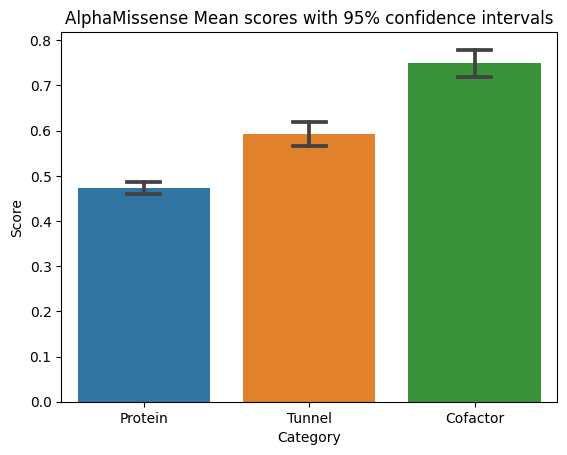

In [58]:


# Reshape for seaborn
melted = datax.melt(var_name="Category", value_name="Score")
sns.barplot(data=melted, x="Category", y="Score", ci=95, capsize=0.2)

plt.title("AlphaMissense Mean scores with 95% confidence intervals")
plt.ylabel("Score")
plt.show()


In [59]:
#ANOVA

In [60]:
f_stat, p_value = stats.f_oneway(datax["Protein"], datax["Tunnel"], datax["Cofactor"])

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 122.15859754494545
p-value: 2.802052529234209e-33


In [61]:

protein_scores = list(datax["Protein"])
tunnel_scores = list(datax["Tunnel"])
cofactor_scores = list(datax["Cofactor"])

# Slouč vše do jednoho DataFrame
df = pd.DataFrame({
    "Score": protein_scores + tunnel_scores + cofactor_scores,
    "Category": (
        ["Protein"] * len(protein_scores) +
        ["Tunnel"] * len(tunnel_scores) +
        ["Cofactor"] * len(cofactor_scores)
    )
})

# Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Score"], groups=df["Category"], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Cofactor Protein  -0.2766  -0.0 -0.3185 -0.2346   True
Cofactor  Tunnel  -0.1576  -0.0 -0.1996 -0.1157   True
 Protein  Tunnel   0.1189   0.0  0.0769  0.1609   True
------------------------------------------------------
